<a href="https://colab.research.google.com/github/spriyam095/LeuronN/blob/master/DIGIT%20CLASSIFIER%20USING%20KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Digit** **Classification**

In the following notebook we are going to built a model that will classify the handwritten digits as '0', '1',.....'9'. We will built it using Keras.
##                         Lets Go
 
 First we import important libraries 

In [1]:
#importing all the necessary libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import adam
from keras.utils import np_utils
from matplotlib import pyplot

Using TensorFlow backend.


Next we load the Dataset provided by keras as Train & Test data:

In [0]:
#load_dataset
(X_train_orig, Y_train_orig), (X_test_orig,Y_test_orig) = mnist.load_data()

Now lets study our data a bit before we go any further.

In [3]:
print("shape of X_train-",X_train_orig.shape)
print("shape of X_test-",X_test_orig.shape)
print("shape of Y_train-",Y_train_orig.shape)
print("shape of Y_test-",Y_test_orig.shape)

shape of X_train- (60000, 28, 28)
shape of X_test- (10000, 28, 28)
shape of Y_train- (60000,)
shape of Y_test- (10000,)


Now lets take a look on how our data looks like and then we will reshape accordingly. The library that comes handy in here is **MATPLOTLIP**  

Y_train_orig-- 3


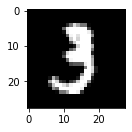

In [4]:
index=10
pyplot.subplot(235)
pyplot.imshow(X_train_orig[index],cmap=pyplot.get_cmap('gray'))
print('Y_train_orig--', Y_train_orig[index])    #feel free to experiment with the index value and make your observations

Now as we are aware of our dataset, how it looks like. We have gotta reshape it so as to pass it through our covolutional layers.

Our shape here is in the form of (num_samples,rows,cols) that needs to be in the form of (batch_size,rows,cols,channels).

Since our image is grayscale therefore channels here would be 1, but in case of RGB image channels are 3.

MOVING ON

In [5]:
X_train = X_train_orig.reshape(X_train_orig.shape[0],X_train_orig.shape[1],X_train_orig.shape[2],1).astype('float32')
X_test = X_test_orig.reshape(X_test_orig.shape[0],X_test_orig.shape[1],X_test_orig.shape[2],1).astype('float32')

print("shape of X_Train-", X_train.shape)
print("shape of X_Test-", X_test.shape)

shape of X_Train- (60000, 28, 28, 1)
shape of X_Test- (10000, 28, 28, 1)


Now we normalize our data. Noramlly our pixel values lies in between *0-255*. But we scale it to *0-1* for better and fast learning.

In [0]:
#Normalizing from 0-255 to 0-1
X_train = X_train/255
X_test/=255

Now we convert our labels(Y) to one-hot encoders as every digit from 0 to 9 is important to us.

SO our **7** may look like  [0,0,0,0,0,0,0,1,0,0]

In [7]:
classes = 10 #->0-9(ten digits) 
Y_train = np_utils.to_categorical(Y_train_orig , classes)
Y_test = np_utils.to_categorical(Y_test_orig , classes)

index=3
print(Y_train[index]) #try change index and make your observations

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Now its time to built a model.

In [8]:
#create model

model= Sequential()
model.add(Conv2D(32, (5,5), input_shape = (X_train.shape[1],X_train.shape[2],1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


its time we compile our model. We use adam optimizer and categorial loss for our model to learn.

In [9]:
model.compile(optimizer='adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

Lets train our model. We go with 10 epochs with batchsize of 200

In [10]:
model.fit(x=X_train, y=Y_train, batch_size=200, epochs=10, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 37s 611us/step - loss: 0.3103 - acc: 0.9060 - val_loss: 0.0767 - val_acc: 0.9754
Epoch 2/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.0773 - acc: 0.9763 - val_loss: 0.0461 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 36s 601us/step - loss: 0.0564 - acc: 0.9825 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 35s 585us/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0330 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.0384 - acc: 0.9878 - val_loss: 0.0262 - val_acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.0331 - acc: 0.9896 - val_loss: 0.0248 - val_acc: 0.9927
Epoch 7/10
600

As we see , we got out our training and test time accuracy to be 99.67 and 99.07 respectively which is quite impressive. Lets try testing our own local image. For that I downloaded a grayscale image from browser and uploaded in colab. Following code will do that 

In [14]:
from google.colab import files 
uploaded = files.upload()

Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 5.jpg to 5.jpg


Now lets predict our *uploaded image*

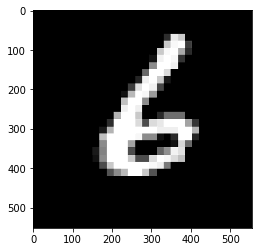

Prediction results-- [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

photo = '6.png'
im=mpimg.imread(photo)
imgplot = plt.imshow(im)
plt.show()

from PIL import Image

img = Image.open(photo).convert('L')
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

# Predicting the Test set results
y_pred = model.predict(im2arr)
print('Prediction results--', y_pred)
img.show()

That's It **THE END** Hope you enjoyed it.